<h1>Heart Failure Prediction Dataset</h1>
    <h3>Grupo de Estudos 1-d (2022_1) Hype</h3>
        <p>
    - <b>Enunciado:</b>   <a>https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction</a>   
        </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

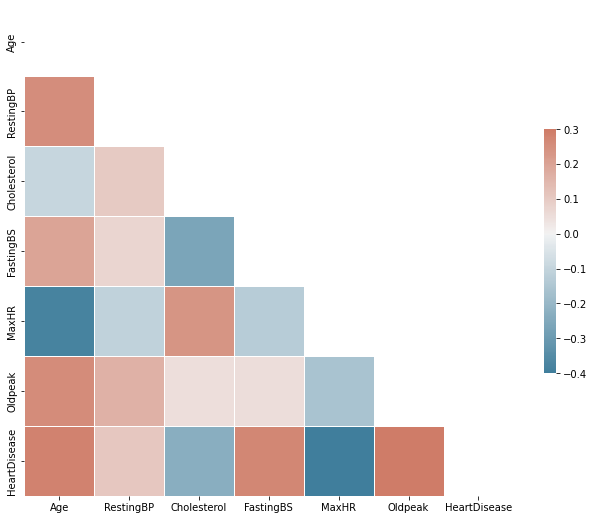

In [26]:
# Correlação
corr = df.corr()

# Gera uma mascara para o tringulo superior formado pela 
# diagonal de "uns"

# np.triu(m, k=0) -> retorna os arrays(m) com até a k-ésima casa zeradas 
# como pode se ver, na correlação, acima da diagonal mediana, 
# os dados se repetem, logo são inuteis

# np.ones_like(a, dtype,...) -> retorna um array com os que possuem o
#mesmo tipo do array a

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


M    725
F    193
Name: Sex, dtype: int64


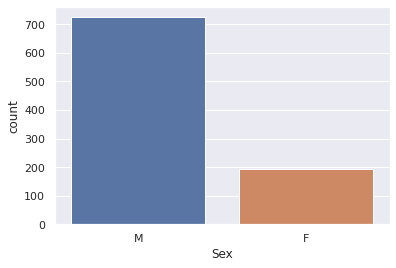

In [30]:
print(df.Sex.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Sex")
plt.show()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


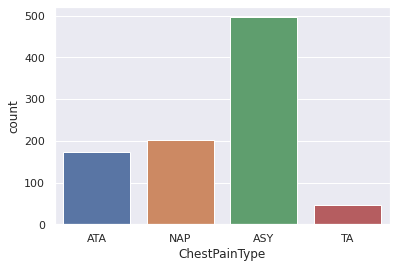

In [31]:
print(df.ChestPainType.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ChestPainType")
plt.show()

<Figure size 504x504 with 0 Axes>

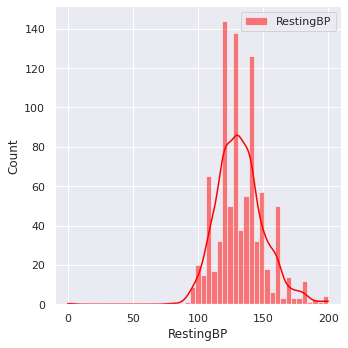

In [33]:
fig = plt.figure(figsize=(7,7))
sns.displot(df.RestingBP, color="red", label="RestingBP", kde= True)
plt.legend()
#tirei o distplot pq deu um aviso de que será removida da lib

/home/semcovici/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/semcovici/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


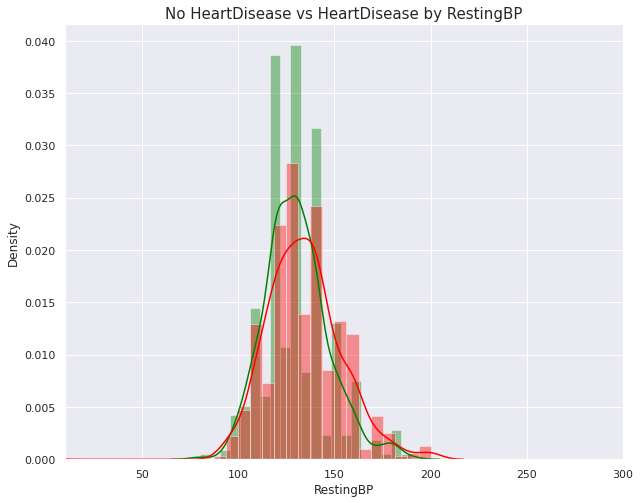

In [39]:
plt.figure(figsize=(10,8))

sns.distplot(df[df['HeartDisease'] == 0]["RestingBP"], color='green') # No HeartDisease - green
sns.distplot(df[df['HeartDisease'] == 1]["RestingBP"], color='red') # HeartDisease - Red

plt.title('No HeartDisease vs HeartDisease by RestingBP', fontsize=15)
plt.xlim([10,300])
plt.show()

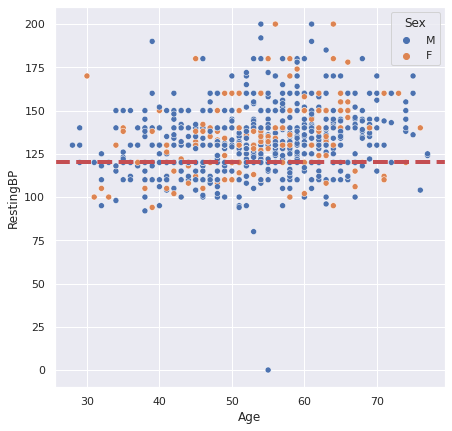

In [40]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="Age", y="RestingBP", hue='Sex')
graph.axhline(y= 120, linewidth=4, color='r', linestyle= '--')
plt.show()

<h2>Tarefas 22/06</h2>
    <p> 
As tarefas que vamos discutir no próximo encontro:

- Vamos iniciar com os modelos de aprendizado de máquina para tentar resolver o nosso problema 

- Estudar os modelos KNN, Árvore de Decisão e Random Forest 

- Codificar algo no Colab (pode ser com base no que eu fiz mas tbm com base no que viu no dojo)
</p>